In [86]:
!pip install matplotlib
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

from glob import glob
from tqdm import tqdm

  0%|          | 0/2 [00:00<?, ?it/s]/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/sirius/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.str` is a deprecated alias for the bui

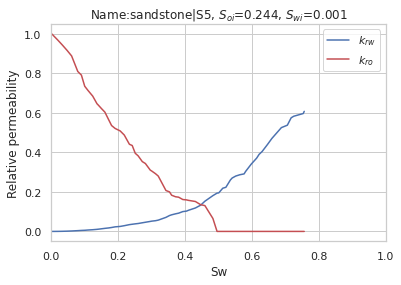

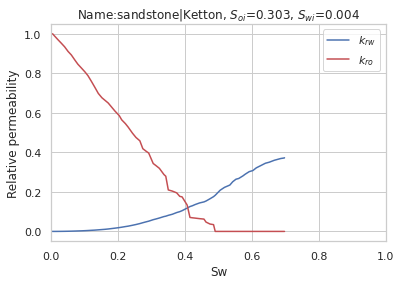

In [119]:
paths = glob('/home/sirius/Документы/Sirius_2022/data/sandstone/**/*imb.out', recursive=True)

df_full = pd.DataFrame(columns=['path', 'Sw', 'Pc(Pa)', 'Krw', 'Kro', 'RI'])

for k in tqdm(range(len(paths))):
    
    filedir = paths[k].split('/')[-2]
    filename = paths[k].split('/')[-1].split('_')[0]
    path = filedir + '|' + filename
    
    df = pd.read_csv(paths[k], skiprows=3, sep='\t', header=None)
    df.rename(columns={0: "Sw",1: "Pc(Pa)",2:"Krw",3:"Kro",4:"RI",5:"CC"}, inplace=True)
    
    Soi=1-df['Sw'].iloc[-1] # irreducible oil saturation
    Swi=df['Sw'].iloc[0] # connate water

    plt.figure()
    plt.plot(df['Sw'],df['Krw'],'b',label='$k_{rw}$')
    plt.plot(df['Sw'],df['Kro'],'r',label='$k_{ro}$')
    plt.xlim([0,1])
    # plt.ylim([0,1])
    plt.xlabel('Sw')
    plt.ylabel('Relative permeability')
    plt.title(f'Name:{path}, ' + '$S_{oi}$=' + np.str(np.round(Soi, 3)) + ', $S_{wi}$=' + np.str(np.round(Swi, 3)))
    plt.legend()
    plt.savefig(f'/home/sirius/Документы/Sirius_2022/figures/rel_perm_plots/{path}.png')
    
    values = []
    values.append(paths[k]) 
    for col in df.columns:
        if col != 'CC':
            values.append(df[col].values)
    df_full.loc[k, df_full.columns] = values

In [78]:
df_full.to_csv('/home/sirius/Документы/Sirius_2022/rel_perm_data.csv', index=False)